In [12]:
import torch
import random
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
""" Организуем воспроизводимость эксперимента"""

random.seed(0)
np.random.seed(0) 
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True # Если обсчитываем на GPU, то детерминистичный режим обеспечит воспрозводимость

In [4]:
"""Воспользуемся одним из стандартных датасетов библиотеки scikit_learn"""
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [5]:
X_train, X_test, y_train, y_test = train_test_split( # Разобьем датасет на тестовую и трейновую часть
    wine.data[:, :2], # Будем использовать только первые 2 колонки для удобства.
    wine.target, # Вторым парметром передадим то что нужно предсказать
    test_size = 0.3, # тестовая часть займет только 30 процентов от всей выборки 
    shuffle = True)

In [6]:
"""Обернем наши холды в тензор"""
X_train = torch.FloatTensor(X_train) # Для дробных чисел
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train) # Для целых чисел
y_test = torch.LongTensor(y_test)

In [7]:
"""Создадим нейросеть, чтобы классифицировать вино"""
class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons) # 1 слой: на входе 2 нейрона, на выходе n ## После нескольких экспериментов выяснилось, что 2 слоя слишком много для такой сети
        self.activ1 = torch.nn.Sigmoid() # функция активации
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons) # 2 слой: на входе n нейронов, на выходе n нейронов
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3) # 3 слой: на входе n нейронов, на выходе 3 нейрона (так как три класса)
        self.sm = torch.nn.Softmax(dim=1) # Считает вероятности классов (веоятность, что обьект принадлежит тому или иному классу)
        
    def forward(self, x): # Эта функция не считает софтмакс так как логарифм и экспонента уничтожат друг друга
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x): # Функция считает форвард, а затем прогоняет ее через софтмакс, чтобы получать вероятности
        x = self.forward(x)
        x = self.sm(x)
        return x
    
wine_net = WineNet(5)

In [8]:
loss = torch.nn.CrossEntropyLoss() # Считаем функцию потерь

optimizer = torch.optim.Adam(wine_net.parameters(), # считаем градиентные шаги
                             lr=1.0e-3) # 0.001 - стандартное значение

In [9]:
np.random.permutation(5) # создает эррей со случайно расположенными числами от 0 до n размера n-1 

array([2, 0, 1, 4, 3])

In [10]:
batch_size = 10 # разделим данные, по 10 частей в каждой части 1 

for epoch in range(5000):
    order = np.random.permutation(len(X_train)) # Случайно перемешаем индексы в датасете
    for start_index in range(0, len(X_train), batch_size): # Каждую эпоху мы будем перемешивать датасет 
                                                            #и затем будем определять подмножества размера batch_size
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size] # Здесь определяются подмножества
        
        x_batch = X_train[batch_indexes] 
        y_batch = y_train[batch_indexes]
        
        preds = wine_net.forward(x_batch) # Пропустим все подмножество через нейросеть и получим предсказание
        
        loss_value = loss(preds, y_batch) # Посчитаем функцию потерь
        loss_value.backward() # Посчитаем производную
        
        optimizer.step() # в конце делаем шаг градиентного спуска и повторяем все действия
        
    if epoch % 100 == 0: # Каждые сто эпох будем выводить метрику, чтобы слежить за результатами обучения 
        test_preds = wine_net.forward(X_test) # считаем форвард по тестовым данным 
        test_preds = test_preds.argmax(dim=1) # считаем предсказание. Чем выше argmax тем выше вероятность
        print((test_preds == y_test).float().mean()) # Посчитаем какая доля максмимального argmax совпадает с максимальной вероятносстью

tensor(0.4074)
tensor(0.4074)
tensor(0.4630)
tensor(0.5000)
tensor(0.4259)
tensor(0.4074)
tensor(0.5185)
tensor(0.5185)
tensor(0.4444)
tensor(0.4259)
tensor(0.5000)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.7407)
tensor(0.6852)
tensor(0.6481)
tensor(0.6852)
tensor(0.6667)
tensor(0.6852)
tensor(0.6852)
tensor(0.6852)
tensor(0.7222)
tensor(0.7037)
tensor(0.7407)
tensor(0.7593)
tensor(0.7778)
tensor(0.7963)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8333)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)


E:\Anaconda\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)


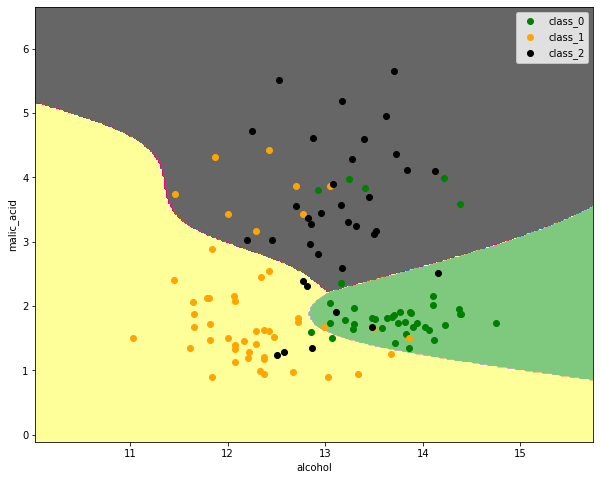

In [11]:
"""Визуализируем результаты"""
plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0], 
                X_train[indexes, 1], 
                c=color, 
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()